In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import math

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


### Males and females participated in the test.

In [4]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

###  Students' Parental level of Education

In [5]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

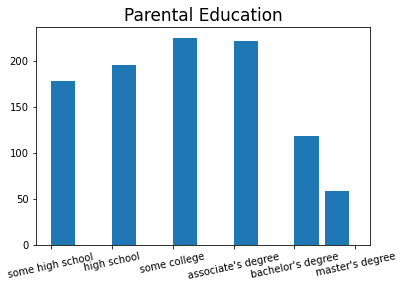

In [14]:
plt.figure()
plt.hist(df['parental level of education'],width=0.4,cumulative=False)
plt.title('Parental Education',fontsize=17)
plt.xticks(rotation=12)
plt.yticks()

 ###   Scores the most on average for math, reading and writing based on Gender & Test preparation course

In [15]:
data=pd.DataFrame(df)

In [16]:
data1=data.mean(axis=0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7536\1678400396.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1=data.mean(axis=0)


In [17]:
data1

math score       66.001
reading score    69.195
writing score    68.119
dtype: float64

In [18]:
data2=data.loc[(df['math score']>66.001)]

In [19]:
data2['gender'].value_counts().idxmax()

'male'

In [20]:
data2['test preparation course'].value_counts().idxmax()

'none'

In [21]:
data2['test preparation course'].mode()

0    none
Name: test preparation course, dtype: object

In [22]:
data3=data.loc[(df['reading score']>69.001)]


In [23]:
data3['gender'].value_counts().idxmax()

'female'

In [24]:
data3['test preparation course'].value_counts().idxmax()

'none'

In [25]:
data4=df.loc[(data['writing score']>68.119)]

In [26]:
data4['gender'].value_counts().idxmax()

'female'

In [27]:
data4['test preparation course'].value_counts().idxmax()

'none'

In [29]:
mean = df.groupby(["gender","test preparation course"]).mean()

In [30]:
mean

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.108696      77.375000      78.793478
       none                      61.320359      69.955090      68.982036
male   completed                 72.988506      70.793103      70.339080
       none                      66.467532      62.581169      59.551948

###  The scoring variation for math, reading and writing based on Gender & Test preparation course

In [31]:
S1=df['math score'].var()

In [32]:
S1

242.4114104104103

In [33]:
S1=data.groupby(["gender"]).var()

In [34]:
S1

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


In [35]:
S1=data.groupby(["test preparation course"]).var()

In [36]:
S1

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


### Bonus points to the top 25% of students based on their  maths score

In [37]:
data.nlargest(250, ['math score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
515,female,group E,some college,standard,none,100,92,97
516,female,group E,bachelor's degree,standard,none,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86
429,female,group E,some high school,standard,none,77,79,80
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
